In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Dropout,Flatten

In [2]:
dirs = os.listdir('animals/')

In [3]:
count=0
for dir in dirs:
    count=count+1
    files = list(os.listdir('animals/'+dir))
    print(dir + '\tFolder has\t' + str(len(files))+'\tImages')

cat	Folder has	60	Images
dog	Folder has	60	Images
elephant	Folder has	60	Images
horse	Folder has	60	Images
lion	Folder has	60	Images
panda	Folder has	60	Images
tiger	Folder has	60	Images


In [4]:
print(count)

7


In [5]:
training_set=tf.keras.utils.image_dataset_from_directory('animals/',validation_split=0.2,subset='training',seed=123,batch_size=32,image_size=(128,128))

Found 420 files belonging to 7 classes.
Using 336 files for training.


In [6]:
test_set=tf.keras.utils.image_dataset_from_directory('animals/',validation_split=0.2,subset='validation',seed=123,batch_size=32,image_size=(128,128))

Found 420 files belonging to 7 classes.
Using 84 files for validation.


In [7]:
animal_names= training_set.class_names
animal_names

['cat', 'dog', 'elephant', 'horse', 'lion', 'panda', 'tiger']

In [8]:
AUTOTUNE=tf.data.AUTOTUNE
training_set=training_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_set=test_set.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
data_augmentation=Sequential([
    layers.RandomFlip('horizontal',input_shape=(128,128,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [10]:
model =Sequential([
    data_augmentation,layers.Rescaling(1./255),
    Conv2D(16,3,padding='same',activation='relu',input_shape=[128, 128, 3]),
    MaxPooling2D(),
    Conv2D(16,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(7)
    
])

In [11]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                  

In [15]:
model.fit(x=training_set,epochs = 30,validation_data=test_set)

Epoch 1/30
11/11 [==============================] - 2s 202ms/step - loss: 1.3962 - accuracy: 0.4315 - val_loss: 1.5343 - val_accuracy: 0.4524
Epoch 2/30
11/11 [==============================] - 2s 193ms/step - loss: 1.3971 - accuracy: 0.4702 - val_loss: 1.3625 - val_accuracy: 0.4762
Epoch 3/30
11/11 [==============================] - 2s 193ms/step - loss: 1.3644 - accuracy: 0.4970 - val_loss: 1.3772 - val_accuracy: 0.4524
Epoch 4/30
11/11 [==============================] - 2s 189ms/step - loss: 1.2635 - accuracy: 0.5030 - val_loss: 1.3244 - val_accuracy: 0.5119
Epoch 5/30
11/11 [==============================] - 2s 190ms/step - loss: 1.2087 - accuracy: 0.5298 - val_loss: 1.3872 - val_accuracy: 0.4762
Epoch 6/30
11/11 [==============================] - 2s 191ms/step - loss: 1.1794 - accuracy: 0.5923 - val_loss: 1.4818 - val_accuracy: 0.3929
Epoch 7/30
11/11 [==============================] - 2s 190ms/step - loss: 1.2126 - accuracy: 0.5208 - val_loss: 1.2160 - val_accuracy: 0.5833
Epoch 

In [18]:
import numpy as np
from keras.preprocessing import image
import keras
import matplotlib.pyplot as plt
def  predict_image(image_path):
    test_image = keras.utils.load_img(image_path, target_size = (128, 128))
    plt.imshow(test_image)
    test_image = keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)

    ans=tf.nn.softmax(result[0])
    animal=animal_names[np.argmax(ans)]
    return animal

1/1 [==============================] - 0s 23ms/step


'cat'

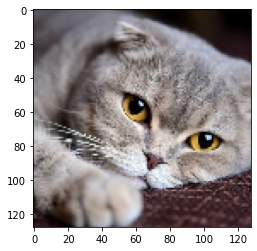

In [19]:
predict_image('animals/cat/39ae72da61.jpg')

In [20]:
model.save('animal.h5')